# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [44]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# lat = []
# temp = []
# for city in cities:
#     params = {
#         "appid": api_key,
#         "q":city,
#         "units":"imperial"
#     }
#     response = requests.get(base_url, params = params)
#     responsejson = response.json()

In [48]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
temp = []
resp = []
hum = []
cloud = []
wind = []
cit = []
for city in cities:
    params = {
        "appid": api_key,
        "q":city,
        "units":"imperial"
    }
    response = requests.get(base_url, params = params)
    responsejson = response.json()
    resp.append(responsejson)
for i in range(len(resp)):
    if resp[i] != {'cod': '404', 'message': 'city not found'}: 
        lat.append(resp[i]['coord']['lat'])
        temp.append(resp[i]['main']['temp'])
        hum.append(resp[i]['main']['humidity'])
        cloud.append(resp[i]['clouds']['all'])
        wind.append(resp[i]['wind']['speed'])
        cit.append(resp[i]['name'])

{'coord': {'lon': 18.6, 'lat': -4.54},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 77.85,
  'pressure': 1012.97,
  'humidity': 72,
  'temp_min': 77.85,
  'temp_max': 77.85,
  'sea_level': 1012.97,
  'grnd_level': 966.38},
 'wind': {'speed': 7.43, 'deg': 78.91},
 'rain': {'3h': 4.125},
 'clouds': {'all': 7},
 'dt': 1567548941,
 'sys': {'message': 0.0068,
  'country': 'CD',
  'sunrise': 1567485865,
  'sunset': 1567529175},
 'timezone': 3600,
 'id': 2316259,
 'name': 'Bulungu',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [71]:
df = pd.DataFrame({"City":cit,"Latitude":lat,"Temperature":temp,"Humidity": hum,"Cloudiness":cloud,
                  "Wind Speed":wind})
df = df[df["Humidity"] <= 100]
df.to_csv("CityData.csv",index = False, header = True)
df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Xichang,27.88,54.45,95,100,1.01
1,Bulungu,-4.54,77.85,72,7,7.43
2,Rikitea,-23.12,72.09,87,100,9.24
3,Severo-Kurilsk,50.68,50.49,95,100,12.91
4,Novoagansk,61.94,47.43,94,82,6.40


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

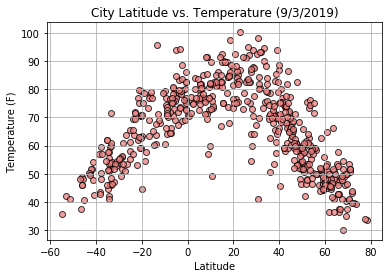

In [93]:
plt.scatter(df["Latitude"],df["Temperature"],facecolors = "lightcoral",edgecolors = "black",alpha = 0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Temperature (9/3/2019)")
plt.savefig("temp.png")

#### Latitude vs. Humidity Plot

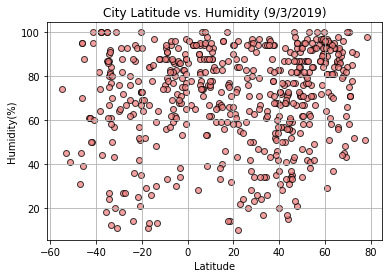

In [94]:
plt.scatter(df["Latitude"],df["Humidity"],facecolors = "lightcoral",edgecolors = "black",alpha = 0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity (9/3/2019)")
plt.savefig("humid.png")

#### Latitude vs. Cloudiness Plot

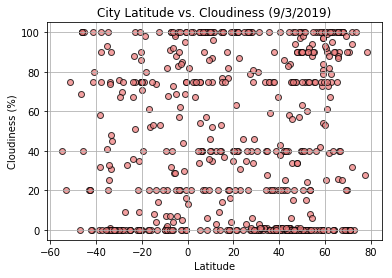

In [95]:
plt.scatter(df["Latitude"],df["Cloudiness"],facecolors = "lightcoral",edgecolors = "black",alpha = 0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (9/3/2019)")
plt.savefig("cloud.png")

#### Latitude vs. Wind Speed Plot

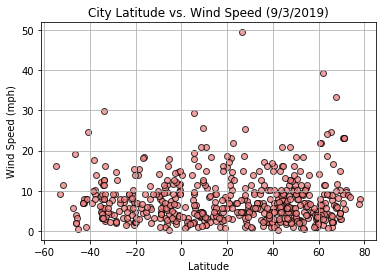

In [96]:
plt.scatter(df["Latitude"],df["Wind Speed"],facecolors = "lightcoral",edgecolors = "black",alpha = 0.75)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (9/3/2019)")
plt.savefig("wind.png")